## 결정트리 모델의 시각화

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Decision Tree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# iris 데이터 로딩, 학습/테스트 세트 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# 결정트리 분류기 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [8]:
from sklearn.tree import export_graphviz

# tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names,
               feature_names=iris_data.feature_names, impurity=True, filled=True)

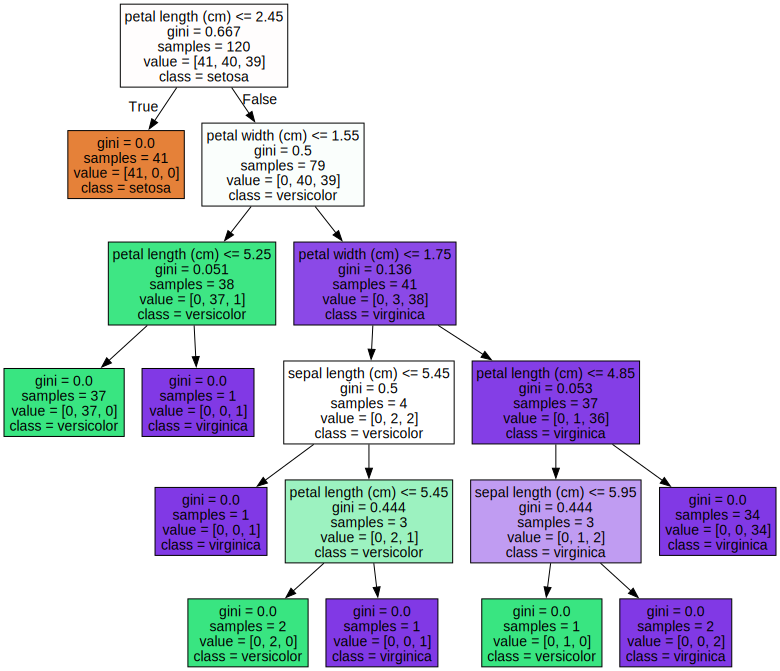

In [9]:
import graphviz

# 위에서 생성된 tree.dot 파일을 읽어서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances: 
[0.025 0.    0.555 0.42 ]
sepal length (cm) 0.025
sepal width (cm) 0.0
petal length (cm) 0.555
petal width (cm) 0.42


<Axes: >

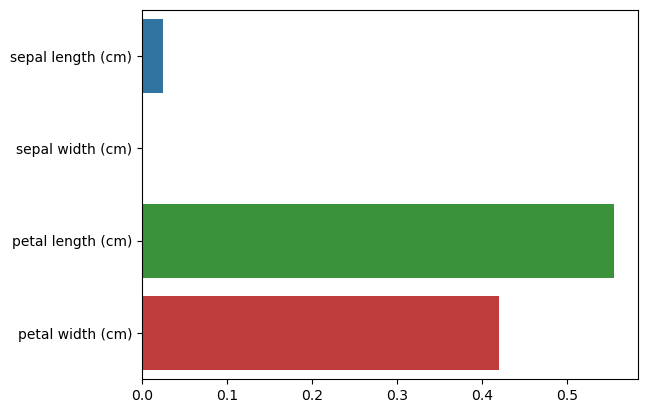

In [19]:
import seaborn as sns
import numpy as np

# feature importance 추출
print(f"Feature importances: \n{np.round(dt_clf.feature_importances_, 3)}")

# feature importance 별 레이블 맵핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(name, np.round(value, 3))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)